In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

from datasets import load_dataset

import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Softmax**

In [5]:
def my_softmax(z):
    ez = np.exp(z)
    a = ez/np.sum(ez)
    return a

In [7]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


# **Load Dataset**

In [13]:
ds = load_dataset("keremberke/chest-xray-classification", name="full")

Extracting data files: 100%|██████████| 3/3 [00:20<00:00,  6.70s/it]
Generating train split: 4077 examples [00:00, 6187.08 examples/s]
Generating validation split: 1165 examples [00:00, 6726.14 examples/s]
Generating test split: 582 examples [00:00, 6008.01 examples/s]


In [19]:
X = ds['train']
y = ds['validation']

In [29]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 4077
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1165
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 582
    })
})


# **Preprocess Data**

In [36]:
from PIL import Image
import numpy as np

# Define a function to resize, convert to grayscale, and flatten an image
def preprocess_image(image_path):
    # Open and resize the image to 20x20 pixels
    image = Image.open(image_path).resize((20, 20))
    # Convert to grayscale
    image = image.convert('L')
    # Flatten the image into a 400-dimensional vector
    image_array = np.array(image).flatten()
    return image_array

# Create empty arrays to store the data and labels
X_train = np.empty((4077, 400), dtype=np.float32)
X_validation = np.empty((1165, 400), dtype=np.float32)
X_test = np.empty((582, 400), dtype=np.float32)

y_train = np.empty((4077,), dtype=np.int32)
y_validation = np.empty((1165,), dtype=np.int32)
y_test = np.empty((582,), dtype=np.int32)

# Iterate through your dataset, preprocess each image, and extract labels
for i, example in enumerate(ds['train']):
    image_path = example['image_file_path']
    image_array = preprocess_image(image_path)
    X_train[i] = image_array
    y_train[i] = example['labels']

for i, example in enumerate(ds['validation']):
    image_path = example['image_file_path']
    image_array = preprocess_image(image_path)
    X_validation[i] = image_array
    y_validation[i] = example['labels']

for i, example in enumerate(ds['test']):
    image_path = example['image_file_path']
    image_array = preprocess_image(image_path)
    X_test[i] = image_array
    y_test[i] = example['labels']

# Now, X_train, X_validation, and X_test contain the flattened 400-dimensional vectors of your images,
# and y_train, y_validation, and y_test contain the corresponding labels.


In [37]:
X_train[0]

array([ 57., 142., 183., 172., 180., 185., 183., 192., 187., 184., 178.,
       184., 188., 188., 184., 187., 171., 176., 170., 125.,  42., 132.,
       173., 169., 188., 197., 207., 189., 179., 191., 192., 197., 176.,
       198., 199., 194., 178., 174., 167., 119.,  30., 106., 161., 186.,
       199., 210., 180., 144., 146., 191., 208., 173., 128., 164., 198.,
       199., 191., 172., 150.,  93.,  35.,  74., 150., 191., 216., 182.,
       126., 119., 137., 194., 217., 158., 123., 123., 158., 207., 207.,
       168., 130.,  59.,  70.,  59., 138., 188., 217., 151., 120., 109.,
       109., 174., 222., 146., 111., 112., 124., 179., 212., 156., 107.,
        43.,  34.,  55., 133., 193., 193., 145., 129., 116., 115., 172.,
       228., 155., 108., 114., 131., 170., 204., 154.,  94.,  37.,  32.,
        53., 131., 200., 173., 136., 125., 124., 133., 190., 230., 171.,
       115., 126., 125., 138., 194., 160.,  87.,  34.,  33.,  52., 132.,
       196., 162., 146., 123., 120., 135., 195., 23

In [38]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

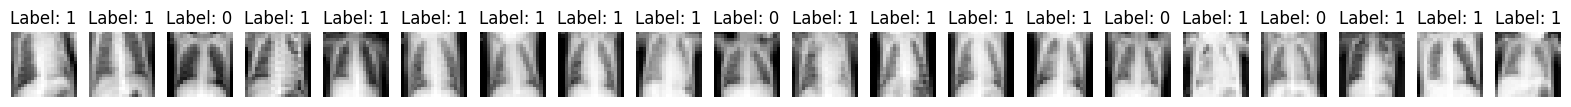

In [56]:
import random

# Define a function to visualize a random subset of the data
def visualize_random_data(images, labels, num_samples):
    num_total_samples = len(images)
    random_indices = random.sample(range(num_total_samples), num_samples)

    fig, axes = plt.subplots(1, num_samples, figsize=(20, 2))
    for i, idx in enumerate(random_indices):
        ax = axes[i]
        ax.imshow(images[idx].reshape(20, 20), cmap='gray')
        ax.set_title(f"Label: {labels[idx]}")
        ax.axis('off')
    plt.show()

# Visualize a random subset of your training data
num_samples_to_visualize = 20
visualize_random_data(X_train, y_train, num_samples_to_visualize)


# **Neural Networks**

In [59]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25, activation='relu', name='L1'),
        Dense(15, activation='relu', name='L2'),
        Dense(10, activation='linear', name='L3')
    ], name = "my_model"
)

In [60]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
[layer1, layer2, layer3] = model.layers

In [62]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [65]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X_train,y_train,
    epochs=40
)

Epoch 1/40


128/128 [==============================] - 1s 3ms/step - loss: 0.2137
Epoch 2/40
128/128 [==============================] - 0s 3ms/step - loss: 0.2222
Epoch 3/40
128/128 [==============================] - 0s 3ms/step - loss: 0.1708
Epoch 4/40
128/128 [==============================] - 0s 2ms/step - loss: 0.1659
Epoch 5/40
128/128 [==============================] - 0s 3ms/step - loss: 0.3014
Epoch 6/40
128/128 [==============================] - 0s 2ms/step - loss: 0.1882
Epoch 7/40
128/128 [==============================] - 0s 3ms/step - loss: 0.2104
Epoch 8/40
128/128 [==============================] - 0s 3ms/step - loss: 0.1886
Epoch 9/40
128/128 [==============================] - 0s 3ms/step - loss: 0.1992
Epoch 10/40
128/128 [==============================] - 0s 2ms/step - loss: 0.1954
Epoch 11/40
128/128 [==============================] - 0s 2ms/step - loss: 0.1703
Epoch 12/40
128/128 [==============================] - 0s 2ms/step - loss: 0.2009
Epoch 13/40
128/128 [===============